# Two Players Zero-Sum Game

Many example of non-cooperative behavior between two adversarial agents can be modelled through zero-sum games [1]. Let us consider vectors $\mathbf{x}_i \in \Delta_i$ as the decision variable of the $i$-th player, with $i \in \{1,2\}$, where $\Delta_i \subset \mathbb{R}^{n_i}$ is the simplex constraints set defined as $\Delta_i := \{\mathbf{x} \in \mathbb{R}^{n_i} : \mathbf{1}^\top \mathbf{x} = 1\}$, for all $i \in \{1,2\}$. Let $\mathbf{x} := \text{col}(\mathbf{x}_i)_{i = 1}^2$. The players try to solve the following problem

$$
\begin{equation}
    \min_{\mathbf{x}_1 \in \Delta_1} \max_{\mathbf{x}_2 \in \Delta_2} \Phi(\mathbf{x}_1, \mathbf{x}_2)
\end{equation}
$$

whose (Nash) equilibrium solution is achieved for $\mathbf{x}^*` satisfying the following

$$
\begin{equation}
    \label{eq:saddle}
    \Phi(\mathbf{x}^*_1, \mathbf{x}_2) \leq \Phi(\mathbf{x}^*_1, \mathbf{x}^*_2) \leq \Phi(\mathbf{x}_1, \mathbf{x}^*_2), \quad \forall \mathbf{x} \in \Delta_1 \times \Delta_2
\end{equation}
$$

For the sake of simplicity, we consider $\Phi(\mathbf{x}_1, \mathbf{x}_2) := \mathbf{x}^\top_1 \mathbf{H} \mathbf{x}_2$, for some $\mathbf{H} \in \mathbb{R}^{n_1 \times n_2}$. Doing so, the equilibrium condition in the previous equation can be written as a VI, with the mapping $F : \mathbb{R}^{n_1 + n_2} \to \mathbb{R}^{n_1 + n_2}$ defined as

$$
\begin{equation}
    F(\mathbf{x}) = \begin{bmatrix} \mathbf{H} \mathbf{x}_1 \\ -\mathbf{H}^\top \mathbf{x}_2 \end{bmatrix} = \begin{bmatrix} & \mathbf{H} \\ -\mathbf{H}^\top & \end{bmatrix} \mathbf{x}
\end{equation}
$$

and $\mathcal{S} = \Delta_1 \times \Delta_2$

## References
[1] Lemke, C. E., & Howson, Jr, J. T. (1964). Equilibrium points of bimatrix games. Journal of the Society for industrial and Applied Mathematics, 12(2), 413-423.


Using: eg
Using: popov
Using: fbf
Using: frb
Using: prg
Using: eag
Using: arg
Using: graal
Using: agraal
Using: hgraal_1
Using: hgraal_2


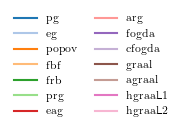

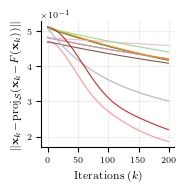

In [2]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

from utils import *
from monviso import VI

np.random.seed(2024)

n1, n2 = 50, 50

# Game matrix
H = np.random.rand(n1, n2)
H_block = np.block([[np.zeros((n1, n2)), H], [-H.T, np.zeros((n1, n2))]])

# VI operators with Liptshitz constant
F = lambda x: H_block @ x
L = np.linalg.norm(H_block, 2)

# Simplex constraints' set
x = cp.Variable(n1 + n2)
S = [lambda x: cp.sum(x[:n1]) == 1, lambda x: cp.sum(x[n1:]) == 1]

# Define the two-players zero sum game as a Variational Inequality
tpzsg = VI(n1 + n2, F, S=S)

# Create two initial (feasible) points
x0 = []
for i in range(2):
    x0.append(np.random.rand(n1 + n2))
    x0[i][:n1] /= x0[i][:n1].sum()
    x0[i][n1:] /= x0[i][n1:].sum()

# Solve the VI using the available algorithms
max_iter = 200
for algorithm, params in cases(x0, L, excluded={"pg", "fogda", "cfogda"}).items():
    print(f"Using: {algorithm}")
    sol = tpzsg.solution(
        algorithm,
        params,
        max_iter,
        log_path=f"logs/zero-sum-game/{algorithm}.log",
    )

plot_results(
    "logs/zero-sum-game",
    "figs/zero-sum-game.pdf",
    r"$\|\mathbf{x}_k \! - \! \text{proj}_{\mathcal{S}}(\mathbf{x}_k \! - \! F(\mathbf{x}_k))\|$",
)
